<a href="https://colab.research.google.com/github/muhammad-usama-aleem/classification_general_military_tank/blob/main/2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install unrar
!unrar x /content/gdrive/MyDrive/images.rar

In [ ]:
!rm -rf /content/vehicles/images

In [ ]:
import os

base_dir = '/content/combined/'
os.mkdir(base_dir)

In [ ]:
!mv /content/vehicles /content/combined

In [ ]:
!mv /content/general /content/combined

In [ ]:
!mv /content/army /content/combined

# EfficientNet Implementation

In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('combined')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['general', 'army', 'vehicles']
Types of classes labels found:  3


In [ ]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('combined' + '/' +item)
#  print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    # print(class_labels[:5])

In [ ]:
print(len(class_labels))

1515


In [ ]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

    Labels                               image
0  general  dataset_path/general/image_821.jpg
1  general   dataset_path/general/image_10.jpg
2  general  dataset_path/general/image_361.jpg
3  general  dataset_path/general/image_623.jpg
4  general  dataset_path/general/image_598.jpg
        Labels                                      image
1510  vehicles  dataset_path/vehicles/challenger_1_l3.jpg
1511  vehicles  dataset_path/vehicles/k21_with_xc8_l1.jpg
1512  vehicles   dataset_path/vehicles/leopard_2a5_l1.jpg
1513  vehicles   dataset_path/vehicles/leopard_2ng_l2.jpg
1514  vehicles       dataset_path/vehicles/leclerc_l4.jpg


In [ ]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1515
general     513
army        502
vehicles    500
Name: Labels, dtype: int64


In [ ]:
import cv2
path = 'combined/'
dataset_path = os.listdir('combined')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
    print(data_path)
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        # img = cv2.resize(img, (im_size, im_size), interpolation=cv2.INTER_CUBIC)
        try:
           img = cv2.resize(img, (im_size, im_size), interpolation=cv2.INTER_AREA)
          #  print(img.shape)
        except:
          print(img, f,'------------------------------------------------------------------------------------------')
        images.append(img)
        labels.append(i)

combined/general
combined/army
combined/vehicles


In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1515, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)
print(len(y))
print(list(set(y)))
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print(y)
print(list(set(y)))

['general' 'general' 'general' ... 'vehicles' 'vehicles' 'vehicles']
1515
['vehicles', 'general', 'army']
[1 1 1 ... 2 2 2]
[0, 1, 2]


In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
print(images.shape, Y.shape)

(1515, 224, 224, 3) (1515, 3)


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=0)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1212, 224, 224, 3)
(1212, 3)
(303, 224, 224, 3)
(303, 3)


# EfficientNetB0


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
# change optimizer and loss function

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Epoch 1/30
38/38 - 268s - loss: 2.8330 - accuracy: 0.4191
Epoch 2/30
38/38 - 260s - loss: 1.6353 - accuracy: 0.5462
Epoch 3/30
38/38 - 259s - loss: 1.4423 - accuracy: 0.6238
Epoch 4/30
38/38 - 257s - loss: 0.8700 - accuracy: 0.7211
Epoch 5/30
38/38 - 256s - loss: 0.8442 - accuracy: 0.7335
Epoch 6/30
38/38 - 255s - loss: 1.0968 - accuracy: 0.7252
Epoch 7/30
38/38 - 256s - loss: 0.5932 - accuracy: 0.8061
Epoch 8/30
38/38 - 256s - loss: 0.4523 - accuracy: 0.8573
Epoch 9/30
38/38 - 256s - loss: 0.5511 - accuracy: 0.8614
Epoch 10/30
38/38 - 256s - loss: 0.3768 - accuracy: 0.8861
Epoch 11/30
38/38 - 256s - loss: 0.3385 - accuracy: 0.8812
Epoch 12/30
38/38 - 256s - loss: 0.2516 - accuracy: 0.9191
Epoch 13/30
38/38 - 257s - loss: 0.1763 - accuracy: 0.9356
Epoch 14/30
38/38 - 260s - loss: 0.2641 - accuracy: 0.9373
Epoch 15/30
38/38 - 261s - loss: 0.2171 - accuracy: 0.9431
Epoch 16/30
38/38 - 261s - loss: 0.3947 - accuracy: 0.9059
Epoch 17/30
38/38 - 261s - loss: 0.5049 - accuracy: 0.8663
Epoch 

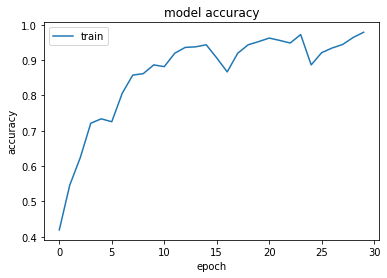

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10/10 [==============================] - 15s 1s/step - loss: 1.3297 - accuracy: 0.7459
Loss = 1.3297492265701294
Test Accuracy = 0.7458745837211609


In [ ]:
print(test_y.shape, len(preds))

(303, 3) 2


In [ ]:
pred = model.predict(test_x)

from sklearn.metrics import confusion_matrix
pred = np.argmax(pred, axis=1)
test_y = np.argmax(test_y, axis=1)
confusion = confusion_matrix(test_y, pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[45 32 18]
 [ 5 88  6]
 [ 2 14 93]]


In [ ]:
print('accuracy', (45+88+93)/303)

accuracy 0.7458745874587459


# loss funtion

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="kullback_leibler_divergence", metrics=["accuracy"] )
# change optimizer and loss function

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Epoch 1/30
38/38 - 274s - loss: 0.2508 - accuracy: 0.9290
Epoch 2/30
38/38 - 265s - loss: 0.1152 - accuracy: 0.9645
Epoch 3/30
38/38 - 267s - loss: 0.1392 - accuracy: 0.9530
Epoch 4/30
38/38 - 267s - loss: 0.1571 - accuracy: 0.9703
Epoch 5/30
38/38 - 267s - loss: 0.1540 - accuracy: 0.9703
Epoch 6/30
38/38 - 266s - loss: 0.1245 - accuracy: 0.9728
Epoch 7/30
38/38 - 266s - loss: 0.1030 - accuracy: 0.9777
Epoch 8/30
38/38 - 266s - loss: 0.0685 - accuracy: 0.9785
Epoch 9/30
38/38 - 267s - loss: 0.0621 - accuracy: 0.9769
Epoch 10/30
38/38 - 266s - loss: 0.0929 - accuracy: 0.9703
Epoch 11/30
38/38 - 264s - loss: 0.0521 - accuracy: 0.9835
Epoch 12/30
38/38 - 265s - loss: 0.0676 - accuracy: 0.9785
Epoch 13/30
38/38 - 267s - loss: 0.1093 - accuracy: 0.9686
Epoch 14/30
38/38 - 265s - loss: 0.0775 - accuracy: 0.9777
Epoch 15/30
38/38 - 264s - loss: 0.5366 - accuracy: 0.8160
Epoch 16/30
38/38 - 265s - loss: 0.4208 - accuracy: 0.8581
Epoch 17/30
38/38 - 266s - loss: 0.2397 - accuracy: 0.9431
Epoch 

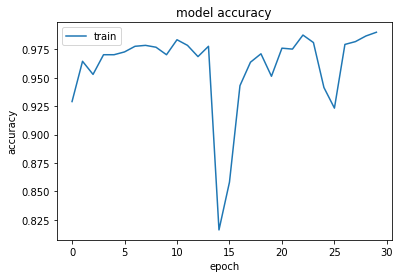

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10/10 [==============================] - 15s 1s/step - loss: 13.2940 - accuracy: 0.3366
Loss = 13.294021606445312
Test Accuracy = 0.3366336524486542


In [ ]:
pred = model.predict(test_x)

from sklearn.metrics import confusion_matrix
pred = np.argmax(pred, axis=1)
# test_y = np.argmax(test_y, axis=1)
confusion = confusion_matrix(test_y, pred)
print('Confusion Matrix\n')
print(confusion, '\n')
print('accuracy', 248/303)

Confusion Matrix

[[76  9 10]
 [13 80  6]
 [13  4 92]] 

accuracy 0.8184818481848185


# optimizer

In [ ]:
model = tf.keras.Model(inputs, outputs)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"] )
# change optimizer and loss function

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Epoch 1/30
38/38 - 273s - loss: 0.0894 - accuracy: 0.9942
Epoch 2/30
38/38 - 264s - loss: 0.2888 - accuracy: 0.9810
Epoch 3/30
38/38 - 264s - loss: 0.0357 - accuracy: 0.9893
Epoch 4/30
38/38 - 263s - loss: 0.1638 - accuracy: 0.9719
Epoch 5/30
38/38 - 263s - loss: 0.0880 - accuracy: 0.9860
Epoch 6/30
38/38 - 263s - loss: 0.0398 - accuracy: 0.9893
Epoch 7/30
38/38 - 265s - loss: 0.0727 - accuracy: 0.9893
Epoch 8/30
38/38 - 265s - loss: 0.0115 - accuracy: 0.9975
Epoch 9/30
38/38 - 264s - loss: 0.0087 - accuracy: 0.9975
Epoch 10/30
38/38 - 265s - loss: 0.0389 - accuracy: 0.9975
Epoch 11/30
38/38 - 264s - loss: 0.0173 - accuracy: 0.9942
Epoch 12/30
38/38 - 263s - loss: 0.0206 - accuracy: 0.9959
Epoch 13/30
38/38 - 262s - loss: 0.0245 - accuracy: 0.9967
Epoch 14/30
38/38 - 262s - loss: 0.0166 - accuracy: 0.9967
Epoch 15/30
38/38 - 262s - loss: 0.1217 - accuracy: 0.9901
Epoch 16/30
38/38 - 262s - loss: 0.0210 - accuracy: 0.9917
Epoch 17/30
38/38 - 263s - loss: 0.0366 - accuracy: 0.9959
Epoch 

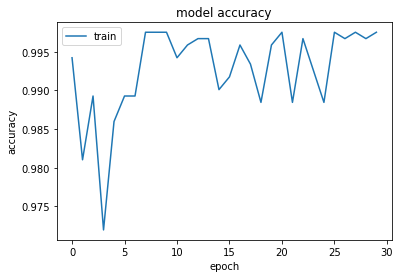

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
pred = model.predict(test_x)

from sklearn.metrics import confusion_matrix
pred = np.argmax(pred, axis=1)
# test_y = np.argmax(test_y, axis=1)
confusion = confusion_matrix(test_y, pred)
print('Confusion Matrix\n')
print(confusion, '\n')

Confusion Matrix

[[64 19 12]
 [ 6 87  6]
 [12  7 90]] 



In [ ]:
print('accuracy', (64+87+90)/303)

accuracy 0.7953795379537953


In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='sgd', loss=tf.keras.losses.KLDivergence(), metrics=["accuracy"] )
# change optimizer and loss function

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Epoch 1/30
38/38 - 271s - loss: 0.0253 - accuracy: 0.9967
Epoch 2/30
38/38 - 265s - loss: 0.0312 - accuracy: 0.9983
Epoch 3/30
38/38 - 263s - loss: 0.0064 - accuracy: 0.9975
Epoch 4/30
38/38 - 263s - loss: 0.0541 - accuracy: 0.9851
Epoch 5/30
38/38 - 261s - loss: 0.0653 - accuracy: 0.9794
Epoch 6/30
38/38 - 261s - loss: 0.0627 - accuracy: 0.9909
Epoch 7/30
38/38 - 261s - loss: 0.0354 - accuracy: 0.9926
Epoch 8/30
38/38 - 260s - loss: 0.0459 - accuracy: 0.9934
Epoch 9/30
38/38 - 262s - loss: 0.0416 - accuracy: 0.9934
Epoch 10/30
38/38 - 262s - loss: 0.0628 - accuracy: 0.9860
Epoch 11/30
38/38 - 261s - loss: 0.0409 - accuracy: 0.9909
Epoch 12/30
38/38 - 260s - loss: 0.0275 - accuracy: 0.9942
Epoch 13/30
38/38 - 260s - loss: 0.0505 - accuracy: 0.9884
Epoch 14/30
38/38 - 260s - loss: 0.0266 - accuracy: 0.9934
Epoch 15/30
38/38 - 259s - loss: 0.0291 - accuracy: 0.9950
Epoch 16/30
38/38 - 261s - loss: 0.0210 - accuracy: 0.9926
Epoch 17/30
38/38 - 261s - loss: 0.0231 - accuracy: 0.9934
Epoch 

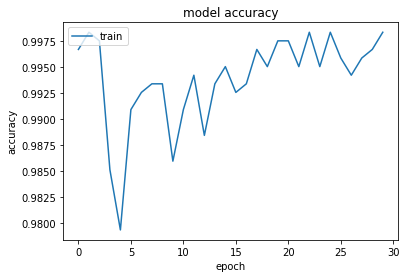

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
pred = model.predict(test_x)

from sklearn.metrics import confusion_matrix
pred = np.argmax(pred, axis=1)
# test_y = np.argmax(test_y, axis=1)
confusion = confusion_matrix(test_y, pred)
print('Confusion Matrix\n')
print(confusion, '\n')

Confusion Matrix

[[72 13 10]
 [10 83  6]
 [13  4 92]] 



In [ ]:
print('accuracy', (72+83+92)/303)

accuracy 0.8151815181518152
